In [ ]:
#Linear discriminant analysis (LDA) can be used for both classification and for dimensionality reduction
#LDA model for the biochemist dataset -whether biochemist is married or not

#art-the number of articles has published
#fem-gender
#mar-married or not (Y)-dependent attribute
#kid5- whehter he has kids
#phd-a numerical metricfor phd
#ment=numerical metric for PhD mentor


In [ ]:
import pandas as pd
!pip install pydataset
from pydataset import data
import matplotlib.pyplot as plt
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
df=data('bioChemists')
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


In [ ]:
df.dtypes

art       int64
fem      object
mar      object
kid5      int64
phd     float64
ment      int64
dtype: object

In [ ]:
#convert objects to integers in the data frame
#convert the fem column(object) to integer using dummy variables
#convert the mar column (object) to integer using dummy variables

In [ ]:
dummy=pd.get_dummies(df['fem'])
df=pd.concat([df,dummy],axis=1)
dummy=pd.get_dummies(df['mar'])
df=pd.concat([df,dummy],axis=1)
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,1,0,1,0
2,0,Women,Single,0,2.05,6,0,1,0,1
3,0,Women,Single,0,3.75,6,0,1,0,1
4,0,Men,Married,1,1.18,3,1,0,1,0
5,0,Women,Single,0,3.75,26,0,1,0,1


In [ ]:
#drop the columns fem and mar
df1=df.drop(['fem','mar'],axis=1)
df1.head()

,art,kid5,phd,ment,Men,Women,Married,Single
1,0,0,2.52,7,1,0,1,0
2,0,0,2.05,6,0,1,0,1
3,0,0,3.75,6,0,1,0,1
4,0,1,1.18,3,1,0,1,0
5,0,0,3.75,26,0,1,0,1


In [ ]:
X=df1[['Men','art','phd','kid5','ment']]
y=df1['Married']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# what does random state mean here-rep

In [ ]:
clf=LDA()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.728125

In [ ]:
y_pred=clf.predict(X_test)  #the actual value is y_test, the model value is y_pred

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        89
           1       0.79      0.78      0.78       186

    accuracy                           0.71       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.71      0.71      0.71       275



In [ ]:
#binary classification ,whether male phd scholar is married or not

Precision=TP/TP+FP
Recall(Sensitivity)=(True postive)/(True postive+False Negative)
(Specificity)=True negative/True negative+False positive
Accurracy=(TP+TN)/(TP+FP+TN+FN)

F1-score=2*(Precison*Recall)/(Precison + recall)
#support -the number of obervations for each class (married or not)
#macro average?
#weighted average?



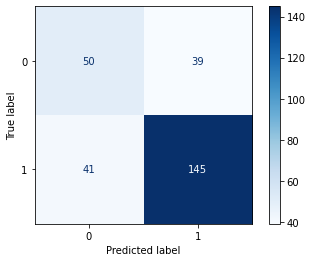

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues)
plt.show()

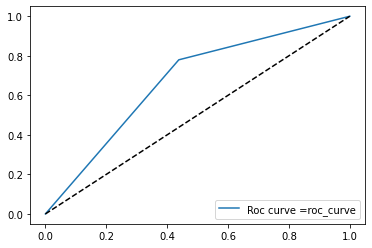

In [ ]:
#TP=50
#FP=39
#TN=41
#FN=145
#roc curve -reciever operator characteristicc urve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="Roc curve =roc_curve")
plt.plot([0,1],[0,1],'k--') #look in net
plt.legend(loc="lower right")

